<a href="https://colab.research.google.com/github/NimaZah/Political-Donation-in-India/blob/main/Donations_to_national_political_parties_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Monetary Donations to Political Parties in India





> Nima Zahedinameghi *UQAM*

## Introduction

This analysis is based on a publicly available dataset on Kaggle.com. The dataset includes information about Indians' monetary contributions to major political parties in India. This analysis has no connection to any organization with which I am associated.





In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's first load the data. Then, we'll be using ```df.head(5)``` to display the first 5 rows of the dataset. It will help us to understand the structure of the dataset.

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/NimaZah/PoliticalDonationIndia/main/Donations%20to%20national%20political%20parties%20-%20India.csv')
df.head(5)

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,FinancialYear,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,"₹ 3,000,000.00",CASH,2010-11,NaN,NaN,NaN,NaN,NaN,NaN
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,"₹ 10,000,000.00","000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15,NaN,NaN,NaN,NaN,NaN,NaN
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,"₹ 108,000.00","Cheque, State Bank of India Parliament House N...",2014-15,NaN,NaN,NaN,NaN,NaN,NaN
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,"₹ 54,000.00",Through Bank Transfer,2011-12,NaN,NaN,NaN,NaN,NaN,NaN
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,"₹ 54,000.00",Through Bank Transfer,2011-12,NaN,NaN,NaN,NaN,NaN,NaN


After examining the dataset, we see several unnamed columns. We'll be dropping those columns to make the dataset more clear.

In [87]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head()

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,FinancialYear
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,"₹ 3,000,000.00",CASH,2010-11
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,"₹ 10,000,000.00","000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,"₹ 108,000.00","Cheque, State Bank of India Parliament House N...",2014-15
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,"₹ 54,000.00",Through Bank Transfer,2011-12
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,"₹ 54,000.00",Through Bank Transfer,2011-12


We use ```shape()``` to find the number of rows and columns in the dataset.

In [88]:
df.shape

(13573, 8)

The ```df.dtypes()``` command will display the data types of each column.

In [89]:
df.dtypes

Party                object
Name                 object
Type                 object
Address              object
PAN Given            object
Amount               object
Contribution Mode    object
FinancialYear        object
dtype: object

```df.describe()``` will display the basic statistics of the dataset.

In [90]:
df.describe()

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,FinancialYear
count,13573,13528,13573,13573,13573,13573,13339,13573
unique,5,10923,2,7280,4,682,10403,12
top,BJP,General Electoral Trust,Others,--,N,"₹ 100,000.00",Cash,2012-13
freq,8782,64,13442,3155,7897,2435,584,3776


A little bit of data cleaning! 
First, we need to remove the special character from the Amount column.
Second, the datatype of Amount needs to be converted to float.


In [91]:
df['Amount'] = df['Amount'].str.replace('₹','')
df['Amount'] = df['Amount'].str.replace(',','')
df['Amount'] = df['Amount'].astype(float)

We compute and show the total amount of donation received by each party. The results clearly show that the BJP received the highest amount of money.

In [93]:
df.groupby('Party')['Amount'].sum()

Party
BJP       9.295526e+09
CPI       6.812370e+07
CPI(M)    1.506221e+08
INC       4.031487e+09
NCP       6.479114e+08
Name: Amount, dtype: float64

We visualize the above finding in a bar chart. More specifically, we want to know which party received the most donations in India.

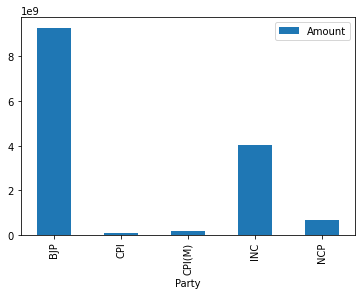

In [92]:
df.groupby(['Party']).agg({'Amount':'sum'}).plot.bar()

We calculate and show the percentage of donations recived by each party

In [94]:
df['Amount'].groupby(df['Party']).sum() / df['Amount'].sum() * 100

Party
BJP       65.490642
CPI        0.479958
CPI(M)     1.061192
INC       28.403416
NCP        4.564791
Name: Amount, dtype: float64

We visualize the percentages in a pie chart

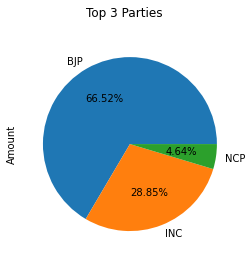

In [95]:
df['Amount'].groupby(df['Party']).sum().nlargest(3).plot(kind='pie', subplots=True, title='Top 3 Parties', autopct='%.2f%%')
plt.show()

Then, we use ```idxmax()``` to quickly find the highest amount of donation received by a single party. The formulation of our question is as follows: 

*What party has received the highest donation in India?*

In [96]:
df.loc[df['Amount'].idxmax()]

Party                                    BJP
Name                 General Electoral Trust
Type                         Electoral Trust
Address                                   --
PAN Given                                  N
Amount                                 5e+08
Contribution Mode               9, HDFC Bank
FinancialYear                        2014-15
Name: 3095, dtype: object

Then, we use ```idxmin()``` to quickly find the lowest amount of donation received by a single party. The formulation of our question is as follows: 

*What party has received the lowest donation in India?*

In [97]:
df.loc[df['Amount'].idxmin()]


Party                                                     CPI
Name                            Shameem Faizee Secretary, CPI
Type                                                   Others
Address              AB-4, Purana Quila Road New Delhi-110034
PAN Given                                                   Y
Amount                                                   1875
Contribution Mode                 Cash, Party Fund Collection
FinancialYear                                         2014-15
Name: 9758, dtype: object

Let's create a graph to show the total donation received in each financial year. The results show that most donations were made in 2014-15.

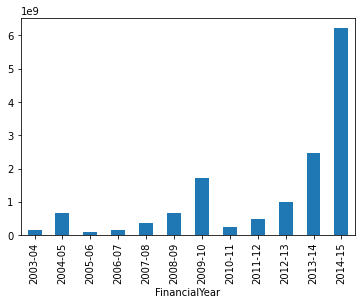

In [98]:
df['Amount'].groupby(df['FinancialYear']).sum().plot.bar()

Now we would like to know the answer to the following question:  What is the total amount received by each party over time?

In [99]:
df['Amount'].groupby([df['FinancialYear'], df['Party']]).sum().unstack()

Party,BJP,CPI,CPI(M),INC,NCP
FinancialYear,,,,,
2003-04,1.168820e+08,779148.0,200000.0,2.830110e+07,NaN
2004-05,3.395213e+08,630000.0,896355.0,3.205556e+08,NaN
2005-06,3.615611e+07,3988690.0,550000.0,5.921249e+07,NaN
2006-07,2.955067e+07,1229400.0,1124719.0,1.212735e+08,NaN
2007-08,2.496237e+08,4125800.0,7226116.0,7.887345e+07,10225000.0
2008-09,3.060572e+08,2585000.0,4155000.0,2.790185e+08,56091000.0
2009-10,8.232201e+08,8667852.0,3962049.0,8.405212e+08,30300000.0
2010-11,1.462533e+08,10811465.0,15357072.0,8.020588e+07,1355000.0
2011-12,3.341941e+08,5982675.0,23838657.0,9.591066e+07,21000000.0


Moving forward, we would like to show the top three parties in India that have received the most donations. 

In [100]:
df_top3 = df.groupby('Party').sum().nlargest(3,'Amount')
df_top3

,Amount
Party,
BJP,9.295526e+09
INC,4.031487e+09
NCP,6.479114e+08


Alternatively, we created a data frame to present the same information. 

In [101]:
df_top3 = df.groupby('Party').sum().nlargest(3,'Amount')
df_top3 = df_top3.reset_index()
df_top3
df_top3 = df_top3.values.tolist()
df_top3

[['BJP', 9295525996.0], ['INC', 4031487349.0], ['NCP', 647911419.0]]

To visualize the insight we need to make use of the following code:

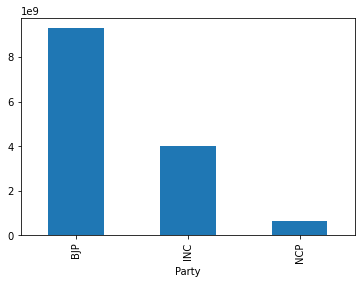

In [102]:
df.groupby('Party')['Amount'].sum().sort_values(ascending=False).head(3).plot(kind='bar')
plt.show()

Finally, we visualize the distribution of donations among the top three parties over time

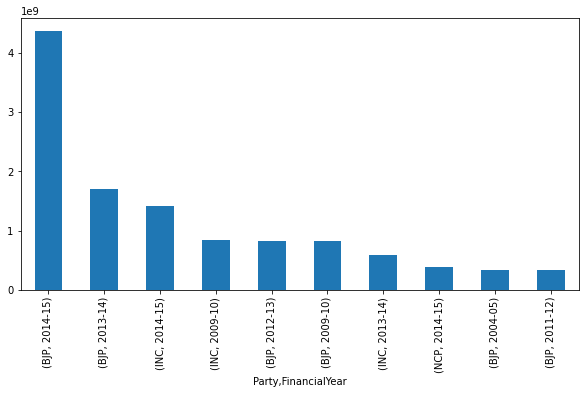

In [103]:
df.groupby(['Party','FinancialYear'])['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,5))
plt.show()